In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

[&larr; Back to Index](index.html)

# Harmonic-Percussive Source Separation

Load two files: one harmonic, and one percussive.

In [2]:
xh, sr_h = librosa.load('audio/prelude_cmaj.wav', duration=7, sr=None)

In [4]:
ipd.Audio(xh, rate=sr_h)

In [5]:
xp, sr_p = librosa.load('audio/125_bounce.wav', duration=7, sr=None)

In [6]:
ipd.Audio(xp, rate=sr_p)

In [8]:
print(len(xh), len(xp))

154350 154350


In [9]:
print(sr_h, sr_p)

22050 22050


Add the two signals together, and rescale:

In [10]:
x = xh/xh.max() + xp/xp.max()
x = 0.5 * x/x.max()

In [11]:
x.max()

0.5

Listen to the combined audio signal:

In [12]:
ipd.Audio(x, rate=sr_h)

Compute the STFT:

In [13]:
X = librosa.stft(x)

Take the log-ampllitude for display purposes:

In [14]:
Xmag = librosa.amplitude_to_db(X)

/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


Display the log-magnitude spectrogram:

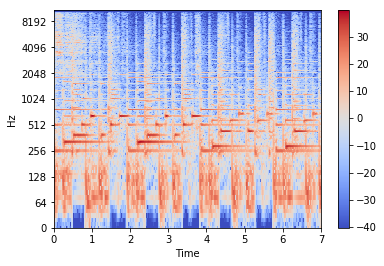

In [15]:
librosa.display.specshow(Xmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar()

Perform harmonic-percussive source separation:

In [16]:
H, P = librosa.decompose.hpss(X)

Compute the log-amplitudes of the outputs:

In [17]:
Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)

Display each output:

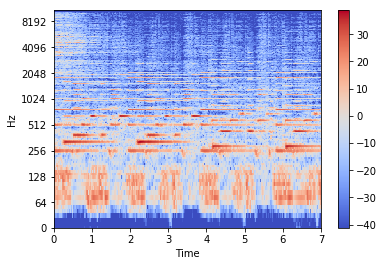

In [18]:
librosa.display.specshow(Hmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar()

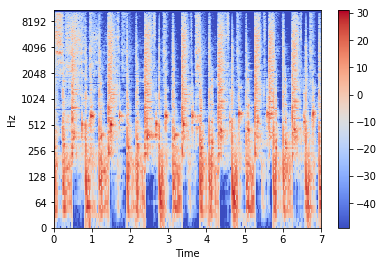

In [19]:
librosa.display.specshow(Pmag, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()

Transform the harmonic output back to the time domain:

In [20]:
h = librosa.istft(H)

Listen to the harmonic output:

In [21]:
ipd.Audio(h, rate=sr_h)

Transform the percussive output back to the time domain:

In [22]:
p = librosa.istft(P)

Listen to the percussive output:

In [23]:
ipd.Audio(p, rate=sr_p)

[&larr; Back to Index](index.html)